In [476]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [477]:
df = pd.read_csv('heart_disease_uci.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [478]:
df['target'] = df.num
df.drop(['slope', 'id', 'cp', 'thal', 'num', 'dataset'], axis=1, inplace=True)
df

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,target
0,63,Male,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0.0,0
1,67,Male,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,3.0,2
2,67,Male,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,2.0,1
3,37,Male,130.0,250.0,False,normal,187.0,False,3.5,0.0,0
4,41,Female,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,1
916,62,Male,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,0
917,55,Male,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,2
918,58,Male,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,0


In [479]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang',
       'oldpeak', 'ca', 'target'],
      dtype='object')

In [480]:
df.sex.value_counts()

Male      726
Female    194
Name: sex, dtype: int64

In [481]:
df.fbs.value_counts()

False    692
True     138
Name: fbs, dtype: int64

In [482]:
df.restecg.value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [483]:
df.exang.value_counts()

False    528
True     337
Name: exang, dtype: int64

In [484]:
df.target.value_counts()

0    411
1    265
2    109
3    107
4     28
Name: target, dtype: int64

In [485]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

df.sex = enc.fit_transform(df.sex)
df.fbs = enc.fit_transform(df.fbs)
df.restecg = enc.fit_transform(df.restecg)
df.exang = enc.fit_transform(df.exang)
df

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,target
0,63,1,145.0,233.0,1,0,150.0,0,2.3,0.0,0
1,67,1,160.0,286.0,0,0,108.0,1,1.5,3.0,2
2,67,1,120.0,229.0,0,0,129.0,1,2.6,2.0,1
3,37,1,130.0,250.0,0,1,187.0,0,3.5,0.0,0
4,41,0,130.0,204.0,0,0,172.0,0,1.4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,127.0,333.0,1,2,154.0,0,0.0,NaN,1
916,62,1,NaN,139.0,0,2,NaN,2,NaN,NaN,0
917,55,1,122.0,223.0,1,2,100.0,0,0.0,NaN,2
918,58,1,NaN,385.0,1,0,NaN,2,NaN,NaN,0


In [486]:
df = df[df['target'].isin([0,1])]
df

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,target
0,63,1,145.0,233.0,1,0,150.0,0,2.3,0.0,0
2,67,1,120.0,229.0,0,0,129.0,1,2.6,2.0,1
3,37,1,130.0,250.0,0,1,187.0,0,3.5,0.0,0
4,41,0,130.0,204.0,0,0,172.0,0,1.4,0.0,0
5,56,1,120.0,236.0,0,1,178.0,0,0.8,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,62,1,158.0,170.0,0,2,138.0,1,0.0,NaN,1
915,54,0,127.0,333.0,1,2,154.0,0,0.0,NaN,1
916,62,1,NaN,139.0,0,2,NaN,2,NaN,NaN,0
918,58,1,NaN,385.0,1,0,NaN,2,NaN,NaN,0


In [487]:
df.isnull().sum()

age           0
sex           0
trestbps     33
chol         26
fbs           0
restecg       0
thalch       33
exang         0
oldpeak      36
ca          453
target        0
dtype: int64

In [488]:
df.trestbps = df.trestbps.fillna(df.trestbps.mean())
df.chol = df.chol.fillna(df.chol.mean())
df.thalch = df.thalch.fillna(df.thalch.mean())
df.oldpeak = df.oldpeak.fillna(df.oldpeak.mean())
df.ca = df.ca.fillna(df.ca.mean())
df

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,target
0,63,1,145.000000,233.0,1,0,150.000000,0,2.300000,0.000000,0
2,67,1,120.000000,229.0,0,0,129.000000,1,2.600000,2.000000,1
3,37,1,130.000000,250.0,0,1,187.000000,0,3.500000,0.000000,0
4,41,0,130.000000,204.0,0,0,172.000000,0,1.400000,0.000000,0
5,56,1,120.000000,236.0,0,1,178.000000,0,0.800000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
913,62,1,158.000000,170.0,0,2,138.000000,1,0.000000,0.399103,1
915,54,0,127.000000,333.0,1,2,154.000000,0,0.000000,0.399103,1
916,62,1,131.068429,139.0,0,2,141.838258,2,0.645938,0.399103,0
918,58,1,131.068429,385.0,1,0,141.838258,2,0.645938,0.399103,0


In [489]:
df.isnull().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
ca          0
target      0
dtype: int64

In [490]:
df.describe()

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,target
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,51.715976,0.742604,131.068429,214.946154,0.282544,0.979290,141.838258,0.393491,0.645938,0.399103,0.392012
std,9.276611,0.437523,17.688958,97.197204,0.602506,0.600876,24.439409,0.580334,0.875975,0.420722,0.488561
min,28.000000,0.000000,80.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-2.600000,0.000000,0.000000
25%,45.000000,0.000000,120.000000,196.000000,0.000000,1.000000,124.000000,0.000000,0.000000,0.399103,0.000000
50%,53.000000,1.000000,130.000000,225.500000,0.000000,1.000000,141.919129,0.000000,0.150000,0.399103,0.000000
75%,58.000000,1.000000,140.000000,268.000000,0.000000,1.000000,160.000000,1.000000,1.000000,0.399103,1.000000
max,76.000000,1.000000,200.000000,603.000000,2.000000,3.000000,202.000000,2.000000,5.000000,3.000000,1.000000


In [491]:
df.age = df.age/max(df.age)
df.trestbps = df.trestbps/max(df.trestbps)
df.fbs = df.fbs/max(df.fbs)
df.restecg = df.restecg/max(df.restecg)
df.thalch = df.thalch/max(df.thalch)
df.exang = df.exang/max(df.exang)
df.oldpeak = df.oldpeak/max(df.oldpeak)
df.ca = df.ca/max(df.ca)
df.chol=df.chol/max(df.chol)
df

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,target
0,0.828947,1,0.725000,0.386401,0.5,0.000000,0.742574,0.0,0.460000,0.000000,0
2,0.881579,1,0.600000,0.379768,0.0,0.000000,0.638614,0.5,0.520000,0.666667,1
3,0.486842,1,0.650000,0.414594,0.0,0.333333,0.925743,0.0,0.700000,0.000000,0
4,0.539474,0,0.650000,0.338308,0.0,0.000000,0.851485,0.0,0.280000,0.000000,0
5,0.736842,1,0.600000,0.391376,0.0,0.333333,0.881188,0.0,0.160000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
913,0.815789,1,0.790000,0.281924,0.0,0.666667,0.683168,0.5,0.000000,0.133034,1
915,0.710526,0,0.635000,0.552239,0.5,0.666667,0.762376,0.0,0.000000,0.133034,1
916,0.815789,1,0.655342,0.230514,0.0,0.666667,0.702170,1.0,0.129188,0.133034,0
918,0.763158,1,0.655342,0.638474,0.5,0.000000,0.702170,1.0,0.129188,0.133034,0


In [492]:
df.describe()

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,target
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,0.680473,0.742604,0.655342,0.356461,0.141272,0.326430,0.702170,0.196746,0.129187,0.133034,0.392012
std,0.122061,0.437523,0.088445,0.161189,0.301253,0.200292,0.120987,0.290167,0.175195,0.140241,0.488561
min,0.368421,0.000000,0.400000,0.000000,0.000000,0.000000,0.341584,0.000000,-0.520000,0.000000,0.000000
25%,0.592105,0.000000,0.600000,0.325041,0.000000,0.333333,0.613861,0.000000,0.000000,0.133034,0.000000
50%,0.697368,1.000000,0.650000,0.373964,0.000000,0.333333,0.702570,0.000000,0.030000,0.133034,0.000000
75%,0.763158,1.000000,0.700000,0.444444,0.000000,0.333333,0.792079,0.500000,0.200000,0.133034,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: >

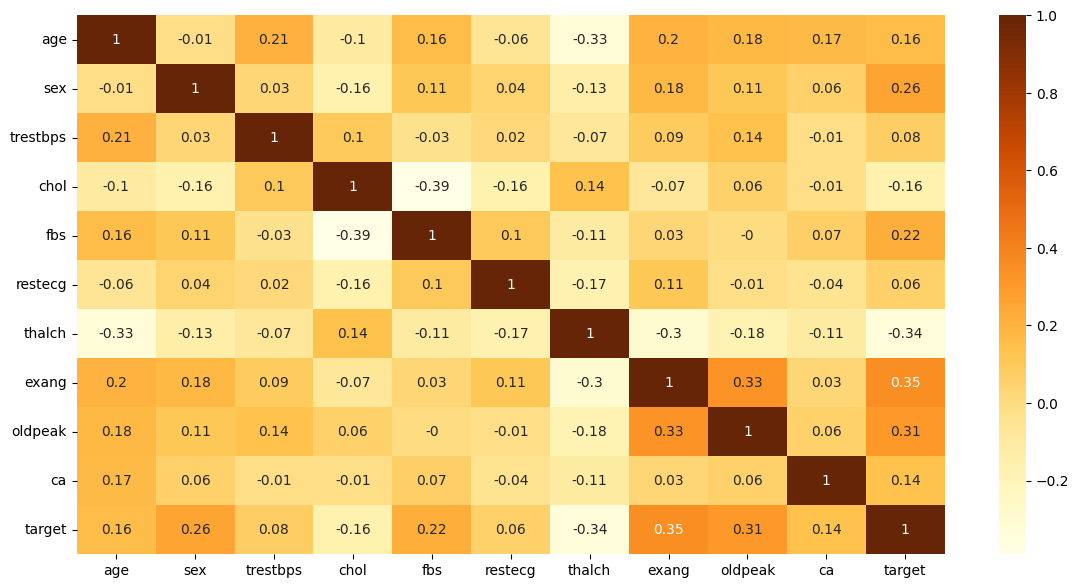

In [493]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [494]:
y = df.target
df.drop(['target'], axis=1, inplace=True)
x= df

In [495]:
x

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca
0,0.828947,1,0.725000,0.386401,0.5,0.000000,0.742574,0.0,0.460000,0.000000
2,0.881579,1,0.600000,0.379768,0.0,0.000000,0.638614,0.5,0.520000,0.666667
3,0.486842,1,0.650000,0.414594,0.0,0.333333,0.925743,0.0,0.700000,0.000000
4,0.539474,0,0.650000,0.338308,0.0,0.000000,0.851485,0.0,0.280000,0.000000
5,0.736842,1,0.600000,0.391376,0.0,0.333333,0.881188,0.0,0.160000,0.000000
...,...,...,...,...,...,...,...,...,...,...
913,0.815789,1,0.790000,0.281924,0.0,0.666667,0.683168,0.5,0.000000,0.133034
915,0.710526,0,0.635000,0.552239,0.5,0.666667,0.762376,0.0,0.000000,0.133034
916,0.815789,1,0.655342,0.230514,0.0,0.666667,0.702170,1.0,0.129188,0.133034
918,0.763158,1,0.655342,0.638474,0.5,0.000000,0.702170,1.0,0.129188,0.133034


In [496]:
y

0      0
2      1
3      0
4      0
5      0
      ..
913    1
915    1
916    0
918    0
919    1
Name: target, Length: 676, dtype: int64

In [497]:
y.shape

(676,)

In [498]:
x.shape

(676, 10)

In [499]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=20)

In [500]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit_transform(xtrain)
ss.transform(xtest)

array([[-0.38177979, -1.70676404, -0.04599533, ..., -0.6831941 ,
        -0.48900335, -0.92940339],
       [-0.4887653 ,  0.58590407, -1.19362689, ...,  1.03273527,
        -0.72254976, -0.03629306],
       [-0.27479427,  0.58590407,  0.52782045, ..., -0.6831941 ,
        -0.72254976, -0.03629306],
       ...,
       [ 2.6138146 , -1.70676404,  0.52782045, ..., -0.6831941 ,
         0.56195552, -0.92940339],
       [ 0.47410432,  0.58590407, -0.04599533, ..., -0.6831941 ,
        -0.72254976, -0.92940339],
       [-1.13067839, -1.70676404, -0.04599533, ..., -0.6831941 ,
         0.91227514, -0.92940339]])

In [501]:
from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier(n_estimators=100, random_state=20)

rfr.fit(xtrain, ytrain)

RandomForestClassifier(random_state=20)

In [502]:
rfr.score(xtrain, ytrain)*100

100.0

In [503]:
rfr.score(xtest, ytest)*100

75.0

In [504]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2)

knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=15)

In [505]:
knn.score(xtrain, ytrain)*100

78.14814814814814

In [506]:
knn.score(xtest, ytest)*100

72.79411764705883

In [507]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(n_estimators=7, num_leaves=40)

lgb.fit(xtrain, ytrain)

LGBMClassifier(n_estimators=7, num_leaves=40)

In [508]:
lgb.score(xtrain, ytrain)*100

80.37037037037037

In [509]:
lgb.score(xtest, ytest)*100

74.26470588235294